#  A Highly Scientific Analysis of NYC Chinese Restaurant Names

In [1752]:
import pandas as pd

In [1753]:
header_list = ["restaurant_names"]

In [1754]:
df = pd.read_csv("C:\\Users\\riley\\OneDrive\\Desktop\\Data Portfolio Project\\Airbnb Live Dashboard\\restaurant_names.csv",names=header_list)

In [1755]:
df.head()

restaurant_names
0                namesYASO
1            Dumpling Town
2               Chow House
3          Blue Willow 夜来湘
4  Szechuan Mountain House

In [1756]:
df.loc[0]

restaurant_names    namesYASO
Name: 0, dtype: object

In [1757]:
df.loc[0] = "YASO"

In [1758]:
df.shape

(299, 1)

In [1759]:
df.value_counts().head(10)

restaurant_names        
Ma LaLa                     22
Dimmer & Summer             21
Cheng Du Chinese Cuisine    20
Xi’an Famous Foods           6
YASO                         4
Dim Sum Palace               4
3 Times                      3
Chinah                       3
Silky Kitchen                3
Han Dynasty                  3
dtype: int64

In [1760]:
df_unique = df.drop_duplicates()

In [1761]:
df_unique.shape

(215, 1)

In [1762]:
df_unique.value_counts()

restaurant_names            
3 Times                         1
New Chin Chin Wu Restaurant     1
New Double Dragon               1
New Fuleen Palace Restaurant    1
New Moon                        1
                               ..
Hao Noodle - West Village       1
Hao Noodle Chelsea              1
Happy Hot Hunan                 1
Hardee                          1
Zhongzhong Noodles - Bronx      1
Length: 215, dtype: int64

In [1763]:
provinces_and_cities_list = ["Anhui", "Beijing", "Chongqing", "Fujian", "Gansu", "Guangdong", "Guangxi", 
"Guizhou", "Hainan", "Hebei", "Heilongjiang", "Henan", "Hubei", "Hunan", "Inner Mongolia", 
"Jiangsu", "Jiangxi", "Jilin", "Liaoning", "Ningxia", "Qinghai", "Shaanxi", "Shandong", 
"Shanghai", "Shanxi", "Sichuan", "Tianjin", "Tibet", "Xinjiang", "Yunnan", "Zhejiang", 'China', 'Tibet', 'Hong Kong', 'Taiwan',"Shanghai",
    "Beijing",
    "Guangzhou",
    "Shenzhen",
    "Tianjin",
    "Chengdu",
    "Chongqing",
    "Wuhan",
    "Hangzhou",
    "Dongguan",
    "Nanjing",
    "Xi'an",
    "Shenyang",
    "Hefei",
    "Suzhou",
    "Foshan",
    "Zhengzhou",
    "Changsha",
    "Harbin",
    "Qingdao",
    "Kunming",
    "Guiyang",
    "Ningbo",
    "Taiyuan",
    "Jinan"]

In [1764]:
df_unique[df_unique['restaurant_names'].str.contains('Noodle')]

restaurant_names
10             Very Fresh Noodles
23                 Noodle Village
34          DunHuang Miss Noodles
41      Tasty Hand-Pulled Noodles
43             Hao Noodle Chelsea
81      Hao Noodle - West Village
109    YunShang Rice Noodle House
145          Great NY Noodle Town
193                    Noodle Fun
197  Tasty Hand Pulled Noodles II
199      E Noodle 粥麵館 - Chinatown
202    Zhongzhong Noodles - Bronx
223         The Handpulled Noodle
232       Yummy Noodle House 粥麵之家
266     Tonii’s Fresh Rice Noodle
281                   Noodlecraft

In [1765]:
df_unique

restaurant_names
0                                  YASO
1                         Dumpling Town
2                            Chow House
3                       Blue Willow 夜来湘
4               Szechuan Mountain House
..                                  ...
293                     Oriental Garden
294  Uncle Ted’s Modern Chinese Cuisine
295                 Shanghai You Garden
296        New Fuleen Palace Restaurant
297                          China King

[215 rows x 1 columns]

In [1766]:
words = df_unique['restaurant_names'].str.split(' ', expand=True)
words = words.stack().reset_index(level=1, drop=True).rename('word')

In [1767]:
words.value_counts()

Restaurant    19
Kitchen       17
House         13
-             13
Chinese       13
              ..
Lai            1
YunShang       1
Wo             1
MáLà           1
Fuleen         1
Name: word, Length: 357, dtype: int64

In [1768]:
word_count_df = pd.DataFrame(words.value_counts())

In [1769]:
len(word_count_df)

357

In [1770]:
word_count_df.reset_index(inplace=True)

In [1771]:
word_count_df.columns = ['word', 'count']

In [1772]:
len(word_count_df)

357

In [1773]:
char_list = ['!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '-', '+', '~', 
'/', '\\', '{', '}', '[', ']', ';', ':', '"', "'", ',', '<', '>', '.', '?', 'the','to','To' ,'On','The','of', 'Of', 'And', 'and', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '21', '95', '99', 'A', 'a']

In [1774]:
import re

In [1775]:
word_count_df = word_count_df[~word_count_df['word'].isin(char_list)]

In [1776]:
word_count_df['percent_of_words'] = word_count_df['count']/sum(word_count_df['count'])



In [1777]:
word_count_df['percent_of_restaurants'] = word_count_df['count']/len(df_unique)

In [1778]:
fifty_family_names = ['Wang', 'Li', 'Zhang', 'Liu', 'Chen', 'Yang', 
'Huang', 'Zhao', 'Wu', 'Zhou', 'Xu', 'Sun', 'Ma', 'Luo', 'Gao', 'He', 
'Zhang', 'Lin', 'Zhu', 'Jiang', 'Ye', 'Qian', 'Feng', 'Cao', 'Cui', 'Wen', 
'Cheng', 'Dai', 'Dong', 'Hu', 'Ji', 'Han', 'Guan', 'Ou', 'Qian', 'Qin', 
'Song', 'Su', 'Tang', 'Tian', 'Wei', 'Xia', 'Yan', 'Ye', 'Yuan', 'Yue', 
'Zhang', 'Zheng', 'Zhu', 'Zou']

In [1779]:
chinese_restaurant_animals = ['Phoenix', 'Dragon', 'Tiger', 'Dragonfly', 'Elephant', 
'Fish', 'Panda', 'Crane', 'Lion', 'Turtle', 'Swan', 'Shark', 'Cat', 'Rabbit', 'Horse', 
'Snake', 'Frog', 'Rooster', 'Duck', 'Fox', 'Stork', 'Peacock', 'Monkey', 'Wolf', 'Lamb', 
'Antelope', 'Swallow', 'Sparrow', 'Bat', 'Deer', "Hen", 'Bull', 'Cow', 'Pig', 'Bird']

In [1780]:
chinese_city_names = ['Beijing', 'Shanghai', 'Guangzhou', 'Shenzhen', 'Chongqing', 'Tianjin', 
'Wuhan', 'Hangzhou', 'Chengdu', 'Nanjing', "Xi'an", 'Fuzhou', 'Xiamen', 'Qingdao', 'Shenyang', 
'Suzhou', 'Zhengzhou', 'Dalian', 'Changsha', 'Nanchang', 'Kunming', 'Guilin', 'Shantou', 
'Zhongshan', 'Taizhou', 'Wuxi', 'Zibo', 'Hohhot', 'Yantai', 'Hefei', 'Jinan', 'Huizhou', 
'Changzhou', 'Urumqi', 'Harbin', 'Weifang', 'Jiaxing', 'Baotou', 'Lanzhou', 'Ningbo',
'Taiyuan', 'Jilin', 'Luoyang', 'Datong', 'Linyi', 'Xining']

In [1781]:
chinese_restaurant_foods = ['Wonton','Roll','Noodle','Noodles','Apricot' 'Dumpling', 'Dumplings','Dim Sum', 'Pot',
'Mapo', 'Tofu', 'Chow Mein', 'Spring Roll', 'Sweet and Sour', 'Kung Pao Chicken', 
'Beef and Broccoli', 'Egg Foo Young', 'Egg', 'Rolls', 'Wonton', 'Pot Sticker', 
'Chicken and Cashews', "General Tso's Chicken", 'Cashew Chicken', 'Chow Fun', 
'Beef and Snow Peas', 'Orange Chicken', 'Mongolian Beef', 'Eggplant in Garlic Sauce', 
'Szechuan Chicken', 'Pork Fried Rice', 'Beef Chow Mein', 'Broccoli and Beef', 'Pepper Steak', 
'Garlic Chicken', 'Teriyaki', 'Chicken', 'Mu Shu Pork', 'Moo Goo Gai Pan', 'Crab', 'Rangoon', 
'Lo Mein', 'Peking,' ,'Duck', 'Beef and Broccoli', 'Shrimp', 'Fried' ,'Rice', 'Sesame', 
'Egg Drop Soup', 'Chicken and Broccoli', 'Baozi', 'Bao', 'Miso', 'Soup','noodles', 'Spice','Chai','Nut', "Rangoon", 'Apple','CHILI', 'Chili' 'Food', 'Mayo', 'Cuisine', 'Food']

In [1782]:
import re

In [1783]:
word_count_df.sort_values(by='count', ascending=False).head(30)

word  count  percent_of_words  percent_of_restaurants
0   Restaurant     19          0.033392                0.088372
1      Kitchen     17          0.029877                0.079070
2        House     13          0.022847                0.060465
4      Chinese     13          0.022847                0.060465
5     Shanghai     12          0.021090                0.055814
6       Noodle     10          0.017575                0.046512
7        China      9          0.015817                0.041860
9          New      7          0.012302                0.032558
11     Village      6          0.010545                0.027907
12         Wok      6          0.010545                0.027907
10    Dumpling      6          0.010545                0.027907
13       Taste      5          0.008787                0.023256
14     Cuisine      5          0.008787                0.023256
15      Garden      5          0.008787                0.023256
18         Dim      5          0.008787                0.023256
19     Noodles      5          0.008787                0.023256
26       Spicy      4          0.007030                0.018605
30       Hunan      4          0.007030                0.018605
29        West      4          0.007030                0.018605
28         Bao      4          0.007030                0.018605
27        Soup      4          0.007030                0.018605
21     Chelsea      4          0.007030                0.018605
25         Bar      4          0.007030                0.018605
24        King      4          0.007030                0.018605
23      Golden      4          0.007030                0.018605
22       Asian      4          0.007030                0.018605
20         Wah      4          0.007030                0.018605
39        Rice      3          0.005272                0.013953
46       Joe’s      3          0.005272                0.013953
45         Sum      3          0.005272                0.013953

In [1784]:
import re
import numpy as np

In [1785]:
precious_metals = ["Gold", "Silver", "Platinum", "Diamond", "Jade", "Ruby", 
                   "Sapphire", "Emerald", "Opal", "Amethyst", "Topaz",
                     "Aquamarine", "Tourmaline", "Garnet", "Citrine", 
                     "Peridot", "Zircon", "Tanzanite", "Turquoise", "Moonstone", 
                     "Onyx", "Jade", "Iolite", "Spinel", "Lapis Lazuli", "Malachite"]

In [1786]:
tastes = ['Sweet', 'Sour', 'Spicy', 'Salty', 'Bitter', 'Tasty', "Taste", 'Hot', 'Cold', 'Silky', 'Yum', 'Fresh', 'Delicious', 'Excellent', 'Good' ]

In [1787]:
sun_moon_old_new_list = ['Sun', 'Moon', 'Old', 'New']

In [1788]:
direction_list = ['North', 'South', 'East', 'West', 'Southeast', 'Southwest', 'Northeast', 'Northwest', 'Central']

In [1789]:
places_list = ['Restaurant', 'Bar', 'Kitchen', 'Lounge', 'House', 'Garden', 'Room', 'Village', 'City', 'Town', 'Eatery', 'Home', 'Diner', 'house', 'Eatery', 'Pub', 'Bistro', 'Alley', 'Forest', 'Orchard']

In [1790]:
royalty_list = ['King','Queen','Prince', 'Princess', 'Emperor', 'Grand' , 'Great','Empire', 'Royal', 'Dynasty', 'Crown', 'Palace', 'Noble', 'Empress', 'Imperial']

In [1791]:
word_count_df.sort_values(by='count', ascending=False).head(30)

word  count  percent_of_words  percent_of_restaurants
0   Restaurant     19          0.033392                0.088372
1      Kitchen     17          0.029877                0.079070
2        House     13          0.022847                0.060465
4      Chinese     13          0.022847                0.060465
5     Shanghai     12          0.021090                0.055814
6       Noodle     10          0.017575                0.046512
7        China      9          0.015817                0.041860
9          New      7          0.012302                0.032558
11     Village      6          0.010545                0.027907
12         Wok      6          0.010545                0.027907
10    Dumpling      6          0.010545                0.027907
13       Taste      5          0.008787                0.023256
14     Cuisine      5          0.008787                0.023256
15      Garden      5          0.008787                0.023256
18         Dim      5          0.008787                0.023256
19     Noodles      5          0.008787                0.023256
26       Spicy      4          0.007030                0.018605
30       Hunan      4          0.007030                0.018605
29        West      4          0.007030                0.018605
28         Bao      4          0.007030                0.018605
27        Soup      4          0.007030                0.018605
21     Chelsea      4          0.007030                0.018605
25         Bar      4          0.007030                0.018605
24        King      4          0.007030                0.018605
23      Golden      4          0.007030                0.018605
22       Asian      4          0.007030                0.018605
20         Wah      4          0.007030                0.018605
39        Rice      3          0.005272                0.013953
46       Joe’s      3          0.005272                0.013953
45         Sum      3          0.005272                0.013953

In [1792]:
word_count_df['category'] = np.where(word_count_df['word'].str.contains('|'.join(chinese_restaurant_foods), re.I, regex=True),'food', 
np.where(word_count_df['word'].isin(fifty_family_names), 'family name', 
np.where(word_count_df['word'].str.contains('|'.join(royalty_list), re.I, regex=True), 'royalty', 
np.where(word_count_df['word'].isin(chinese_restaurant_animals), 'animals', 
np.where(word_count_df['word'].str.contains('|'.join(tastes),re.I, regex=True), 'tastes', 
np.where(word_count_df['word'].str.contains('|'.join(precious_metals),re.I, regex=True), 'precious metal',
np.where(word_count_df['word'].str.contains('|'.join(places_list), re.I, regex=True), 'place',
np.where(word_count_df['word'].str.contains('|'.join(direction_list), re.I, regex=True), 'direction',
np.where(word_count_df['word'].str.contains('|'.join(provinces_and_cities_list), re.I, regex=True), 'province', 'other')))))))))


In [1793]:
word_count_df = word_count_df.reset_index()

In [1794]:
word_count_df.drop(columns='index', inplace=True)

In [1795]:
word_count_df.to_csv("nyc_chinese_restaurant_data_clean.csv")

# Vizualizations

In [1796]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

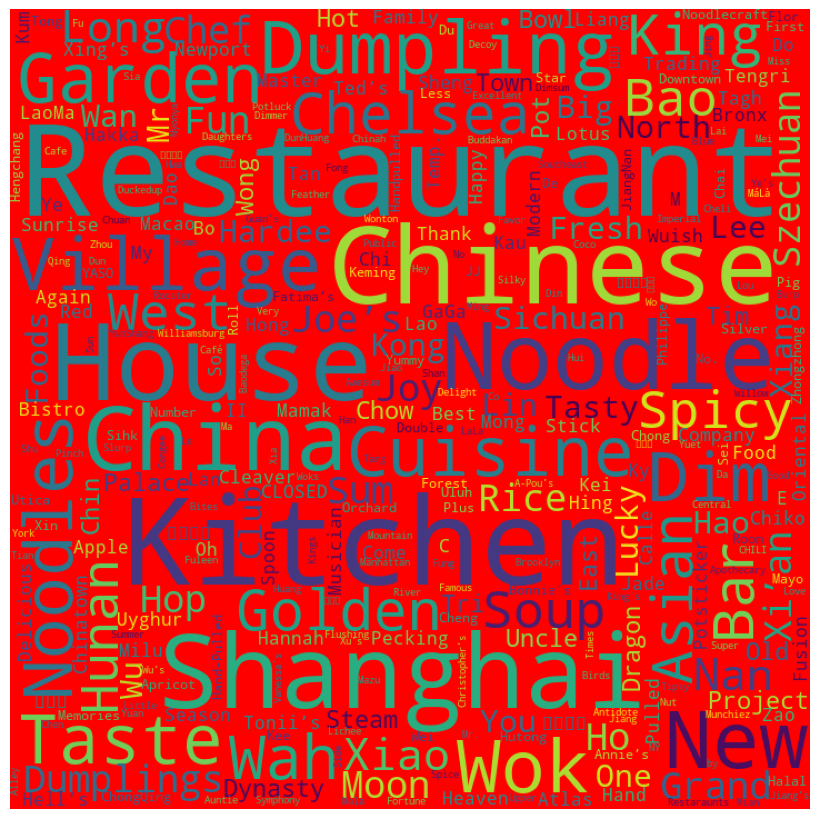

<Figure size 640x480 with 0 Axes>

In [1797]:
wordcloud=WordCloud(width=720, height=720, margin=0,background_color='Red',
max_words = len(word_count_df['word'])).generate_from_frequencies(dict(zip(word_count_df['word'],
word_count_df['count'])))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout(pad=0)
plt.show()

plt.savefig("word_cloud.png", dpi=300)


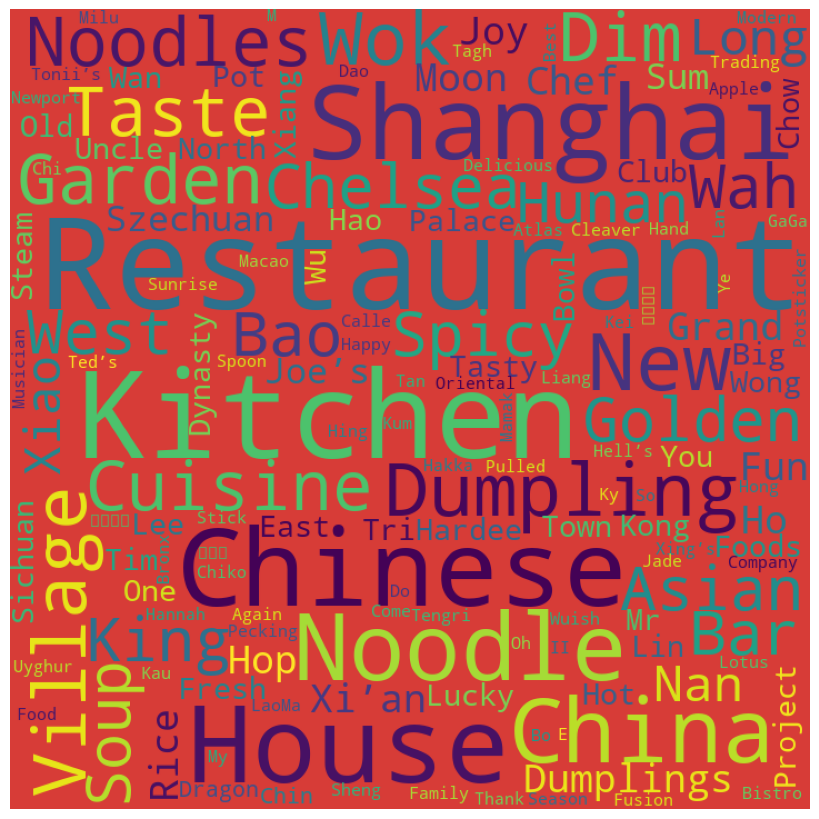

In [1798]:
word_count_df_150 = word_count_df.nlargest(150, 'count')
wordcloud=WordCloud(width=720, height=720, margin=0,background_color='#d73c37',
max_words = len(word_count_df_150['word'])).generate_from_frequencies(dict(zip(word_count_df_150['word'],
word_count_df_150['count'])))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout(pad=0)
plt.show()

In [1799]:
word_count_df['rank'] = word_count_df['count'].rank(ascending=False)

In [1800]:
word_count_df['rank'] = word_count_df['rank'].astype(int)

In [1801]:
word_count_df.sort_values(by='count', ascending=False)

word  count  percent_of_words  percent_of_restaurants  category  \
0    Restaurant     19          0.033392                0.088372     place   
1       Kitchen     17          0.029877                0.079070     place   
2         House     13          0.022847                0.060465     place   
3       Chinese     13          0.022847                0.060465     other   
4      Shanghai     12          0.021090                0.055814  province   
..          ...    ...               ...                     ...       ...   
171    Philippe      1          0.001757                0.004651     other   
172          JJ      1          0.001757                0.004651     other   
173        Plus      1          0.001757                0.004651     other   
174       Utica      1          0.001757                0.004651     other   
340      Fuleen      1          0.001757                0.004651     other   

     rank  
0       1  
1       2  
2       3  
3       3  
4       5  
..    ...  
171   210  
172   210  
173   210  
174   210  
340   210  

[341 rows x 6 columns]

In [1802]:
import random

In [1803]:
COUNTS = word_count_df['count']

In [1804]:
COUNTS = COUNTS.to_list()

In [1805]:
random.seed(23)
random.shuffle(COUNTS)

In [1806]:
COUNT_MIN = np.min(COUNTS)
COUNT_MAX = np.max(COUNTS)

In [1807]:
len(COUNTS)

341

In [1808]:
# low and high refer to the final dot size in the lolipop
def scale_to_interval(x, low=1, high=80):
    return ((x -COUNT_MIN ) / (COUNT_MAX - COUNT_MIN)) * (high - low) + low

### Basic Circular Plot

In [1809]:
# Different shades of grey used in the plot
GREY88 = "#e0e0e0"
GREY85 = "#d9d9d9"
GREY82 = "#d1d1d1"
GREY79 = "#c9c9c9"
GREY97 = "#f7f7f7"
GREY60 = "#999999"

In [1810]:
# values for the x axis
ANGLES = np.linspace(0, 2 * np.pi, len(COUNTS), endpoint=False)

#heights of the lines and y-position of the dot are given by the word count
HEIGHTS = np.array(COUNTS)

#category values for the colors
CATEGORY_CODES = pd.Categorical(word_count_df['category']).codes

In [1811]:
# Colormap taken from https://carto.com/carto-colors/
COLORMAP = ["#7F3C8D","#11A579","#3969AC","#F2B701","#E73F74","#80BA5A","#E68310","#008695","#CF1C90","#f97b72","#4b4b8f","#A5AA99"]

In [1812]:
# Select colors for each word according to its category.
COLORS = np.array(COLORMAP)[CATEGORY_CODES]

In [1813]:
# This is going to be helpful to create some space for labels within the circle 
PLUS = 1.5

In [1814]:
word_count_df.sort_values(by='count', ascending=False).head(8)

word  count  percent_of_words  percent_of_restaurants  category  rank
0  Restaurant     19          0.033392                0.088372     place     1
1     Kitchen     17          0.029877                0.079070     place     2
2       House     13          0.022847                0.060465     place     3
3     Chinese     13          0.022847                0.060465     other     3
4    Shanghai     12          0.021090                0.055814  province     5
5      Noodle     10          0.017575                0.046512      food     6
6       China      9          0.015817                0.041860  province     7
7         New      7          0.012302                0.032558     other     8

In [1815]:
# Create a data frame with the information for the four words that are going to be labeled
LABELS_DF = word_count_df[word_count_df['count'] >= 9].reset_index()

#create labels
LABELS_DF['label'] = [
    f"{word}\nCount: {int(count)}"
    for word, count in zip(LABELS_DF['word'], LABELS_DF['count'])
]
# set position of the labels
LABELS_DF["x"] = [97, 165, 253, 69, 240, 126, 184]
LABELS_DF["y"] = [57, 27, 20, 37, 27, 23, 18]

In [1816]:
LABELS_DF

index        word  count  percent_of_words  percent_of_restaurants  \
0      0  Restaurant     19          0.033392                0.088372   
1      1     Kitchen     17          0.029877                0.079070   
2      2       House     13          0.022847                0.060465   
3      3     Chinese     13          0.022847                0.060465   
4      4    Shanghai     12          0.021090                0.055814   
5      5      Noodle     10          0.017575                0.046512   
6      6       China      9          0.015817                0.041860   

   category  rank                  label    x   y  
0     place     1  Restaurant\nCount: 19   97  57  
1     place     2     Kitchen\nCount: 17  165  27  
2     place     3       House\nCount: 13  253  20  
3     other     3     Chinese\nCount: 13   69  37  
4  province     5    Shanghai\nCount: 12  240  27  
5      food     6      Noodle\nCount: 10  126  23  
6  province     7        China\nCount: 9  184  18

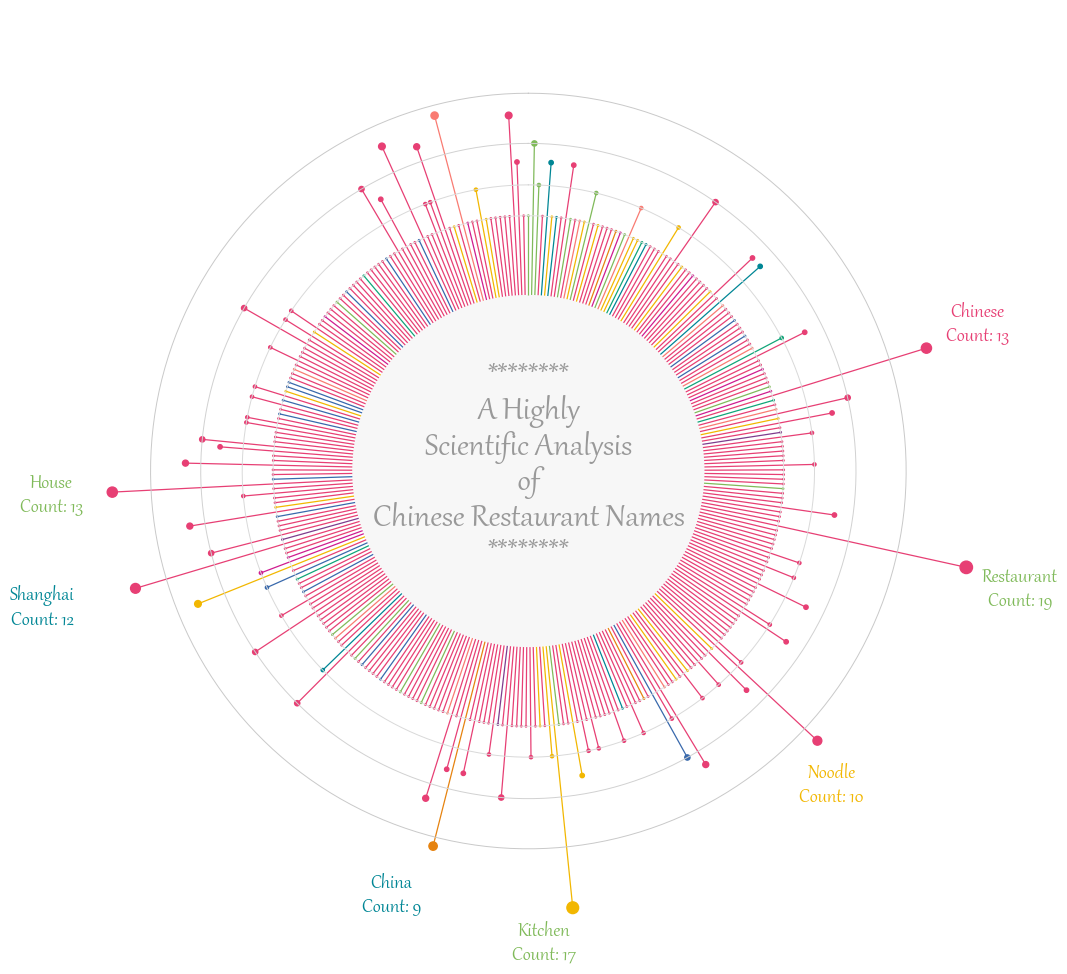

In [1817]:
#initialize the layout in polar coordinates
fig, ax = plt.subplots(figsize=(12,12), subplot_kw={"projection": "polar"})


# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

# Use logarithmic scale for the radial axis
ax.set_rscale('symlog')

# Angular axis starts at 90 degrees, not at 0
ax.set_theta_offset(np.pi / 2)

# Reverse the direction to go counter-clockwise.
ax.set_theta_direction(-1)

# Add lines
ax.vlines(ANGLES, 0 + PLUS, HEIGHTS + PLUS, color=COLORS, lw=0.9)

# Add dots
ax.scatter(ANGLES, HEIGHTS + PLUS, s=scale_to_interval(HEIGHTS), color=COLORS)

# remove spines for both axes
ax.spines["start"].set_color('none')
ax.spines["polar"].set_color("none")

#remove gridlines, ticks, tick labels
ax.grid(False)
ax.set_xticks([])
ax.set_yticklabels([])


# Add our custom grid lines for the radial axis.
# These lines indicate 1, 2, 4, 8 instances of the word
HANGLES = np.linspace(0, 2 * np.pi, 200)
ax.plot(HANGLES, np.repeat(1 + PLUS, 200), color= GREY88, lw=0.7)
ax.plot(HANGLES, np.repeat(2 + PLUS, 200), color= GREY85, lw=0.7)
ax.plot(HANGLES, np.repeat(4 + PLUS, 200), color= GREY82, lw=0.7)
ax.plot(HANGLES, np.repeat(8 + PLUS, 200), color= GREY79, lw=0.7)

# If you have a look at the beginning of this post, you'll see the inner circle is not white.
# This fill creates the effect of a very light grey background.
ax.fill(HANGLES, np.repeat(PLUS, 200), GREY97)

# Note the 'transform=ax.transAxes'
# It allows us to pass 'x' and 'y' in terms of the (0, 1) coordinates of the axis
# instead of having to use the coordinates of the data.
# (0.5, 0.5) represents the middle of the axis in this transformed coordinate system
ax.text(
    x=0.5, y=0.508, s="********\nA Highly\nScientific Analysis\n of \nChinese Restaurant Names\n********",
    color=GREY60, va="center", ha="center", ma="center", fontfamily="Gabriola",
    fontsize=27, fontweight="bold", linespacing=1.1, transform=ax.transAxes)


# Add labels for the five selected words
for idx, row in LABELS_DF.iterrows():
    color = COLORS[row["index"]]
    ax.text(
        x=ANGLES[row["x"]], y=row["y"], s=row["label"], color=color,
        ha="right", va="center", ma="center", size=16,
        family="Gabriola", weight="bold"
        )


In [1818]:
def circular_plot(angles, heights, colors, lw, ax):
    ax.set_facecolor("white")
    
    ax.set_rscale("symlog")
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    ax.spines["start"].set_color("none")
    ax.spines["polar"].set_color("none")
    
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticklabels([])
    
    # The 'lw' argument controls the width of the lines. 
    # This is going to be different for the top and lower panels.
    ax.vlines(angles, 0 + PLUS, heights + PLUS, color=colors, lw=lw)
    ax.scatter(angles, heights + PLUS, s=scale_to_interval(heights), color=colors)
    
    HANGLES = np.linspace(0, 2 * np.pi, 200)
    ax.plot(HANGLES, np.repeat(1 + PLUS, 200), color= GREY88, lw=0.7)
    ax.plot(HANGLES, np.repeat(2 + PLUS, 200), color= GREY85, lw=0.7)
    ax.plot(HANGLES, np.repeat(4 + PLUS, 200), color= GREY82, lw=0.7)
    ax.plot(HANGLES, np.repeat(8 + PLUS, 200), color= GREY79, lw=0.7)

    
    ax.fill(HANGLES, np.repeat(PLUS, 200), GREY97)
    
    # Change upper limit of the radial axis so larger dots fit within the plot area
    ax.set_rmax(ax.get_rmax() * 2)
    


    

In [1819]:
def map_category(category):
    if category =='other':
        return 'Other'
    elif category == "family_name":
        return "Family\nNames"
    elif category == "place":
        return "Places"
    elif category == 'tastes':
        return 'Taste'
    elif category == "food":
        return "Food"
    elif category == "direction":
        return "Direction"
    elif category == 'precious_metal':
        return 'Precious\nMetals'
    elif category == 'royalty':
        return 'Royalty'
    elif category == 'province':
        return 'Chinese\nProvinces\n and\n Cities'
    elif category =='animal':
        return 'Animals'
    else:
        return category

In [1820]:
CATEGORIES = sorted(pd.Categorical(word_count_df["category"]).unique())
LABELS = [map_category(category) for category in CATEGORIES]

In [1821]:
len(COUNTS)

341

In [1822]:
len(ANGLES)

341

In [1823]:
len(HEIGHTS)

341

In [1824]:
word_count_df = word_count_df.reset_index()

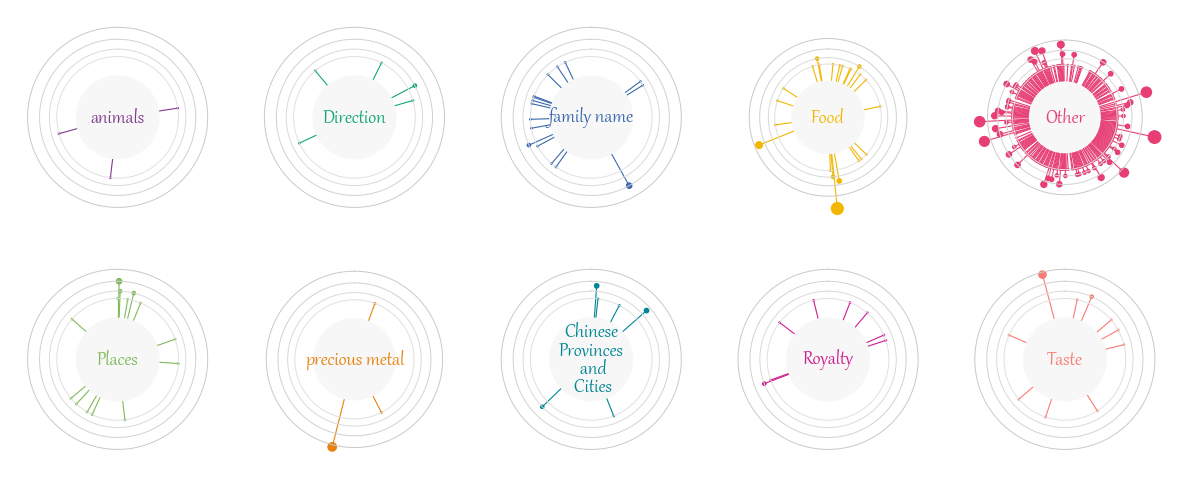

In [1825]:
# The plot consists of 2 rows and 5 columns (10 categories in total)
fig, axes = plt.subplots(2, 5, figsize=(15, 6), subplot_kw={"projection": "polar"})
fig.patch.set_facecolor("white")

# Define the slices used to iterate through 'axes'.
# It iterates in a rowwise manner.
# It starts in the first row, and iterates over all the columns of that row
# from left to right, then it goes to the next row and does the same.
SLICES = [(i, j) for i in range(2) for j in range(5)]


for category, label, slice_ in zip(CATEGORIES, LABELS, SLICES):
    # Select axis
    ax = axes[slice_]

    # Select indexes corresponding to the words in this category
    idx = word_count_df.index[word_count_df["category"] == category].tolist()
    
    # Subset ANGLES, HEIGHTS, and COLORS to use the ones for this category.
    angles = ANGLES[idx]
    heights = HEIGHTS[idx]
    colors = COLORS[idx]
    
    # Create circular plot
    circular_plot(angles, heights, colors, 0.8, ax)
    
    # Add text within the inner circle representing the category
    ax.text(
        x=0.5, y=0.5, s=label, color=colors[0], va="center", ha="center",
        ma="center", fontfamily="Gabriola", fontsize=16, fontweight="bold",
        linespacing=0.87, transform=ax.transAxes

    
    )


# Adjust space between subplots.
# 'wspace=0' leaves no horizontal space between subplots.
# 'hspace=0' leaves no vertical space between subplots.
fig.subplots_adjust(wspace=0.1, hspace=0.1)

In [1826]:
len(ANGLES)

341

In [1827]:
len(COUNTS)

341

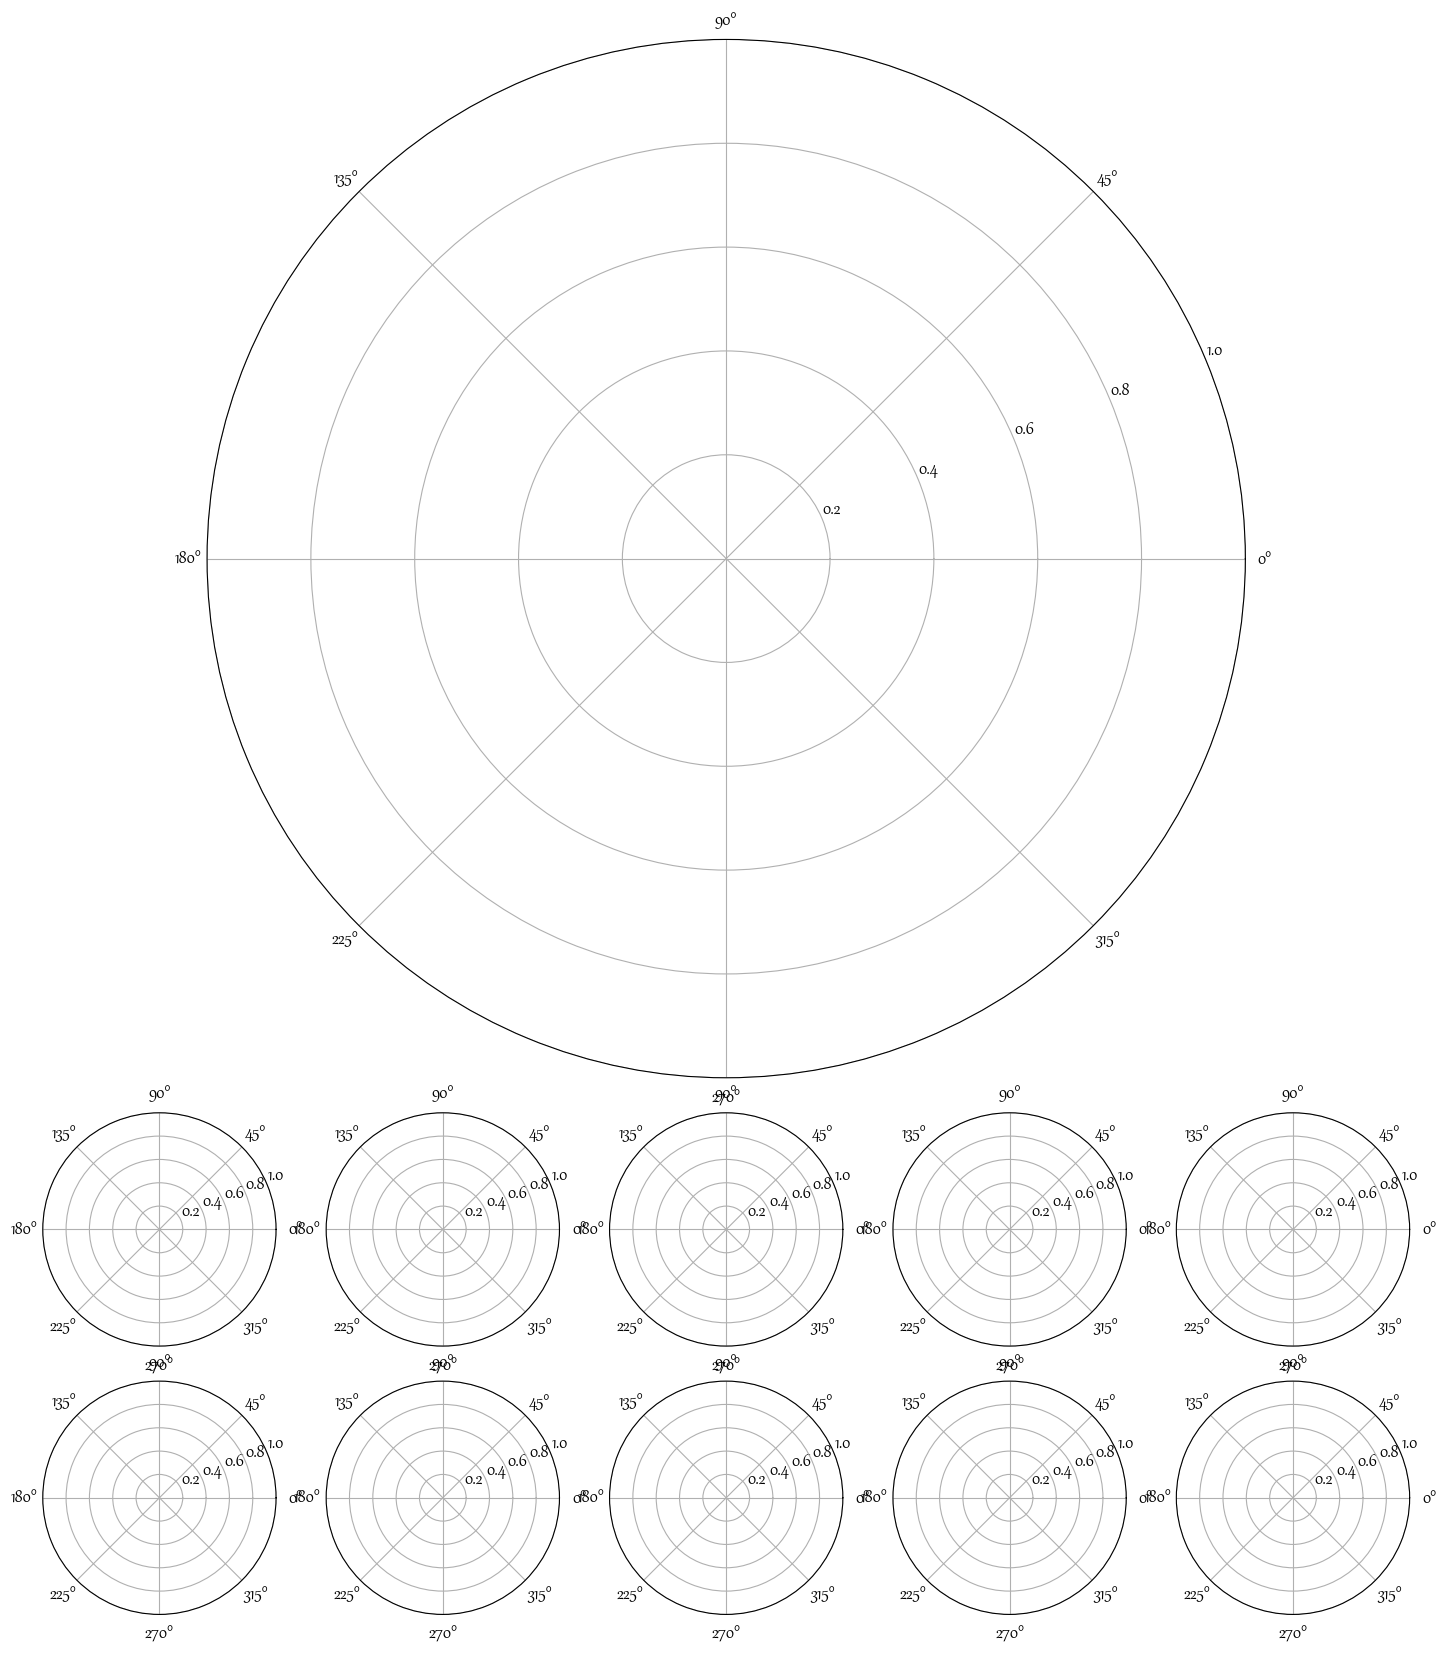

In [1828]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 17.5), subplot_kw={"projection": "polar"})
fig.patch.set_facecolor("white")
gs = axes[0, 0].get_gridspec()

# Remove the underlying axes for the subplots that are going to be combined
for i in range(4):
    for j in range(5):
        axes[i, j].remove()

# Combine subplots into one larger subplot
ax_big = fig.add_subplot(
    gs[:4, :], # takes all the subplots on the first 4 rows.
    projection="polar" # indicates this big axis uses a polar projection
)

# Set its aspect to "equal" so it is centered
ax_big.set_aspect("equal")

# Adjust margin and space between subplots
fig.subplots_adjust(
    left=0.04, bottom=0.05, right=0.96, top=0.95, # margins
    wspace=0.15, hspace=.15 # spaces

)

# Final Circular Lolipop Plot

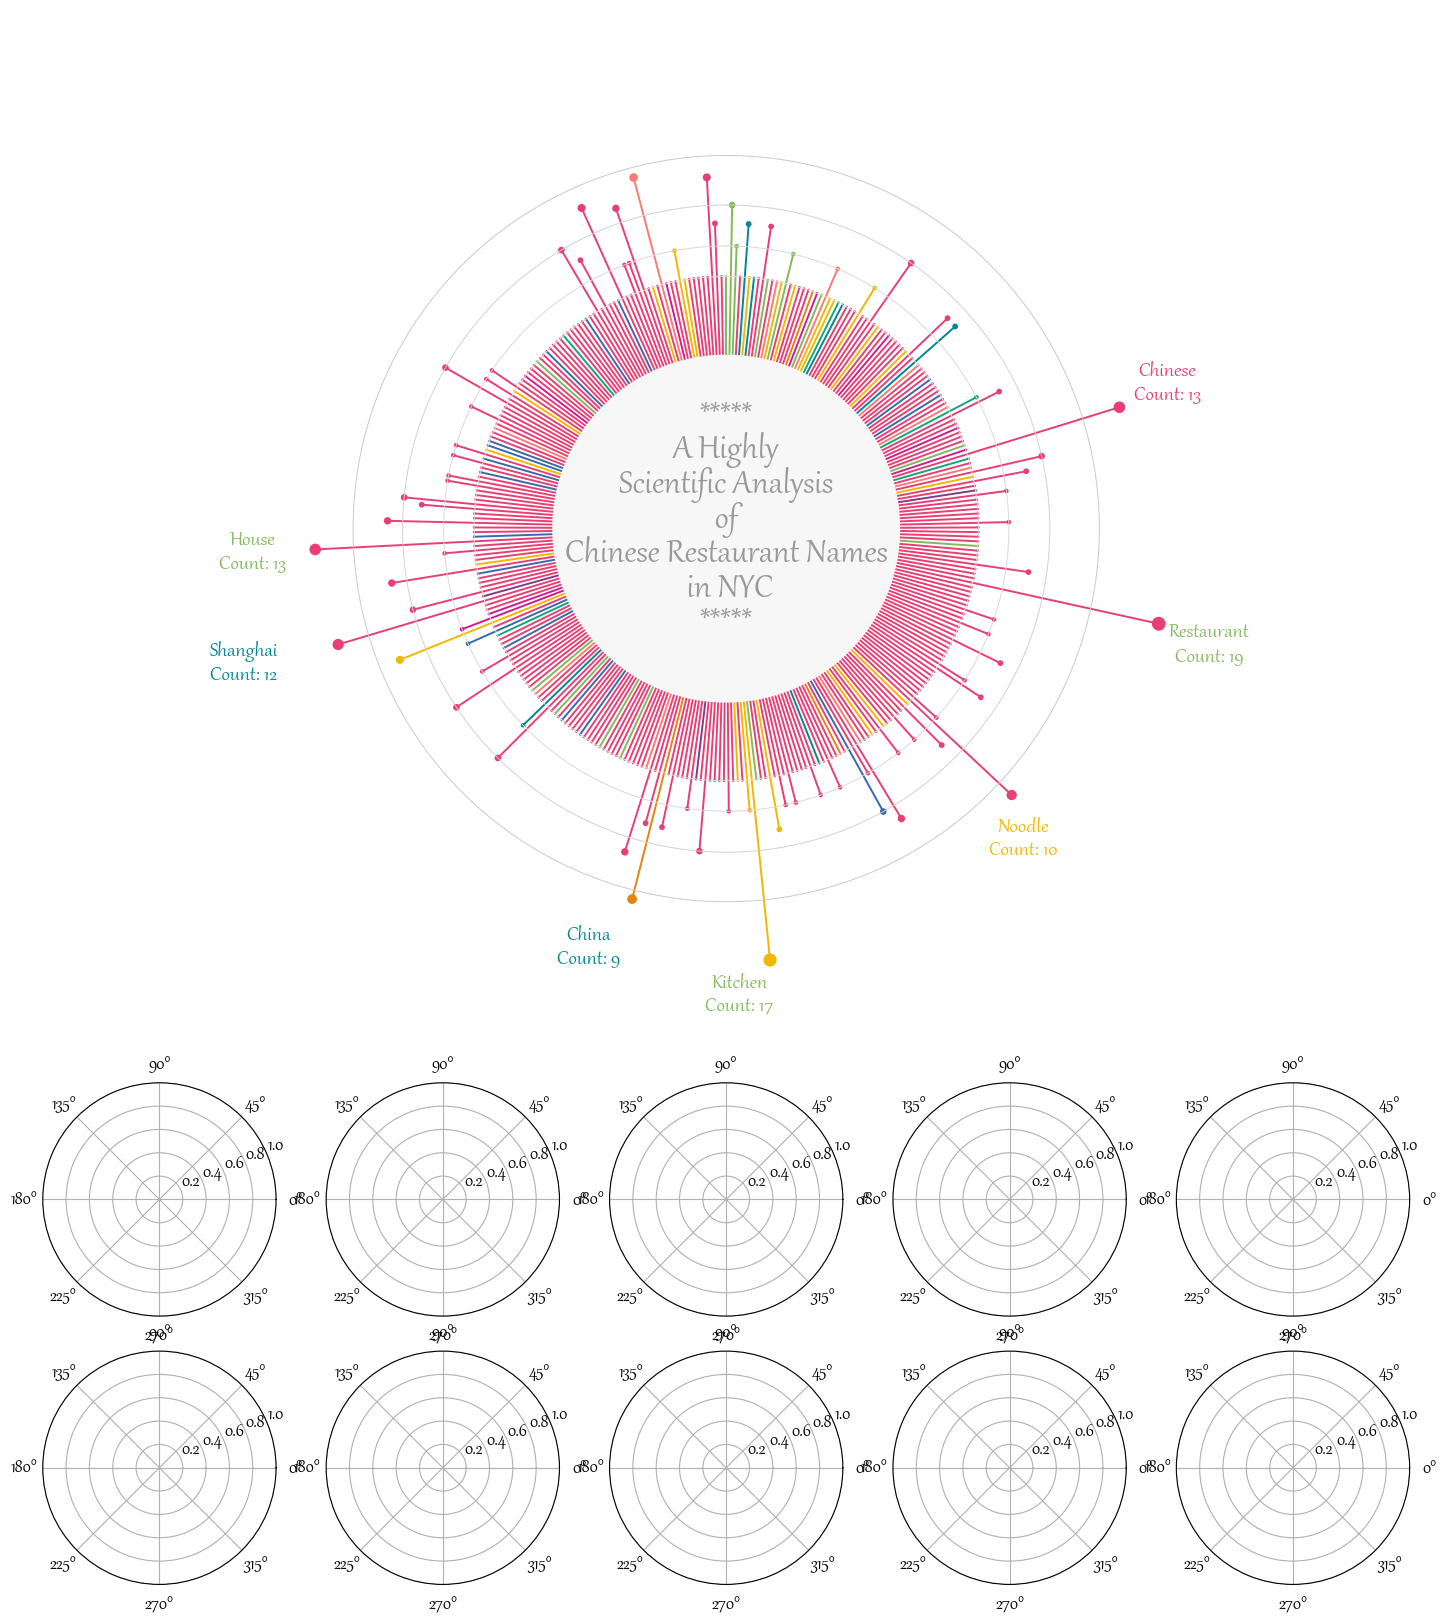

In [1829]:
# Add circular plot
circular_plot(ANGLES, HEIGHTS, COLORS, 1.4, ax_big)
# Add text annotations
for idx, row in LABELS_DF.iterrows():
    color=COLORS[row["index"]]
    ax_big.text(
        ANGLES[row["x"]], row["y"], row["label"], ha="right", va="center",
        ma="center", size=17, family="Gabriola", weight="bold", color=color
    )


ax_big.text(
    x=0.5, y=0.51, s="*****\nA Highly\nScientific Analysis\n of \nChinese Restaurant Names\n in NYC\n*****",
    color=GREY60, va="center", ha="center", ma="center", fontfamily="Gabriola",
    fontsize=28, fontweight="bold", linespacing=0.95, transform=ax_big.transAxes
)
fig

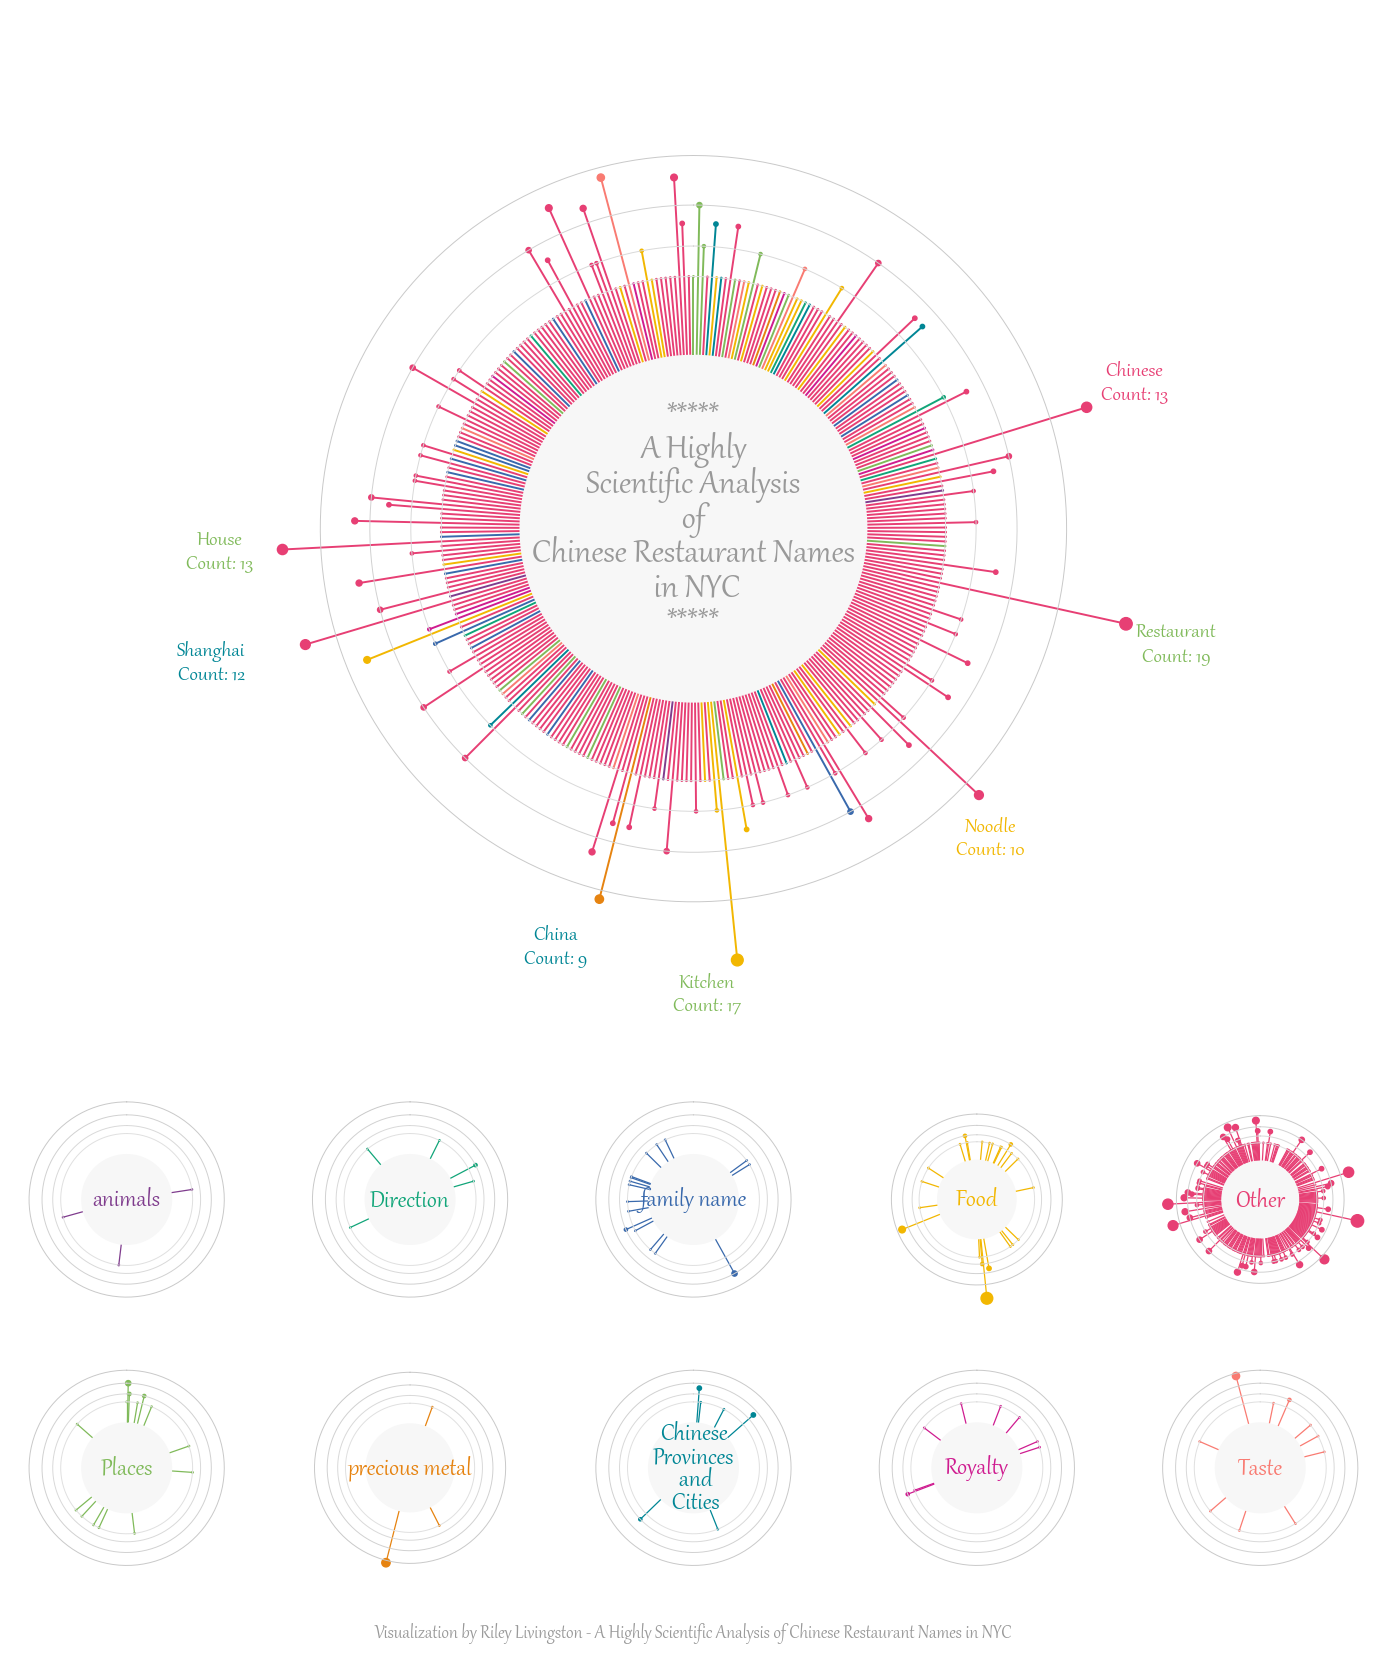

In [1830]:
# Note these have changed because we iterate on rows 
# 4 and 5 (fifth and sixth, respectively)
slices = [(i + 4, j) for i in range(2) for j in range(5)]

for category, label, idx_ax in zip(CATEGORIES, LABELS, slices):
    ax = axes[idx_ax]
    idx = word_count_df.index[word_count_df["category"] == category].tolist()
    
    angles = ANGLES[idx]
    heights = HEIGHTS[idx]
    colors = COLORS[idx]
    
    circular_plot(angles, heights, colors, 0.9, ax)
    
    ax.text(
        x=0.5, y=0.5, s=label, color=colors[0], va="center", ha="center",
        ma="center", fontfamily="Gabriola", fontsize=20, fontweight="bold",
        linespacing=0.87, transform=ax.transAxes
    )

fig.text(
    x=0.5, y=0.02, s="Visualization by Riley Livingston - A Highly Scientific Analysis of Chinese Restaurant Names in NYC",
    color=GREY60, fontsize=15, ha="center", fontfamily="Gabriola", fontweight="bold"
)

# Do something like fig.savefig("plot.png", dpi=300) to have it in better quality.
fig.savefig("circular_lollipop.png", dpi=300)
fig

In [1831]:
res_kit = ['Restaurant', 'Kitchen',  'Chinese', 'China', 'House']

In [1832]:
restaurant_kitchen = word_count_df[word_count_df['word'].isin(res_kit)]


In [1833]:
temp_df = pd.DataFrame({'index': [9],
                        'word': ['Other'],
                        'percent_of_restaurants': [1-(0.088372 + .079070 + .060465 + .060465+  .041860 +  .004651)],
                        'category': ['other']})

In [1834]:
temp_df

index   word  percent_of_restaurants category
0      9  Other                0.665117    other

In [1835]:
restaurant_kitchen = restaurant_kitchen.append(temp_df, ignore_index=True)

C:\Users\riley\AppData\Local\Temp\ipykernel_8272\1571482830.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [1836]:
restaurant_kitchen=restaurant_kitchen.sort_values(by='percent_of_restaurants', ascending=False)

In [1837]:

restaurant_kitchen

index        word  count  percent_of_words  percent_of_restaurants  \
5      9       Other    NaN               NaN                0.665117   
0      0  Restaurant   19.0          0.033392                0.088372   
1      1     Kitchen   17.0          0.029877                0.079070   
2      2       House   13.0          0.022847                0.060465   
3      3     Chinese   13.0          0.022847                0.060465   
4      6       China    9.0          0.015817                0.041860   

   category  rank  
5     other   NaN  
0     place   1.0  
1     place   2.0  
2     place   3.0  
3     other   3.0  
4  province   7.0

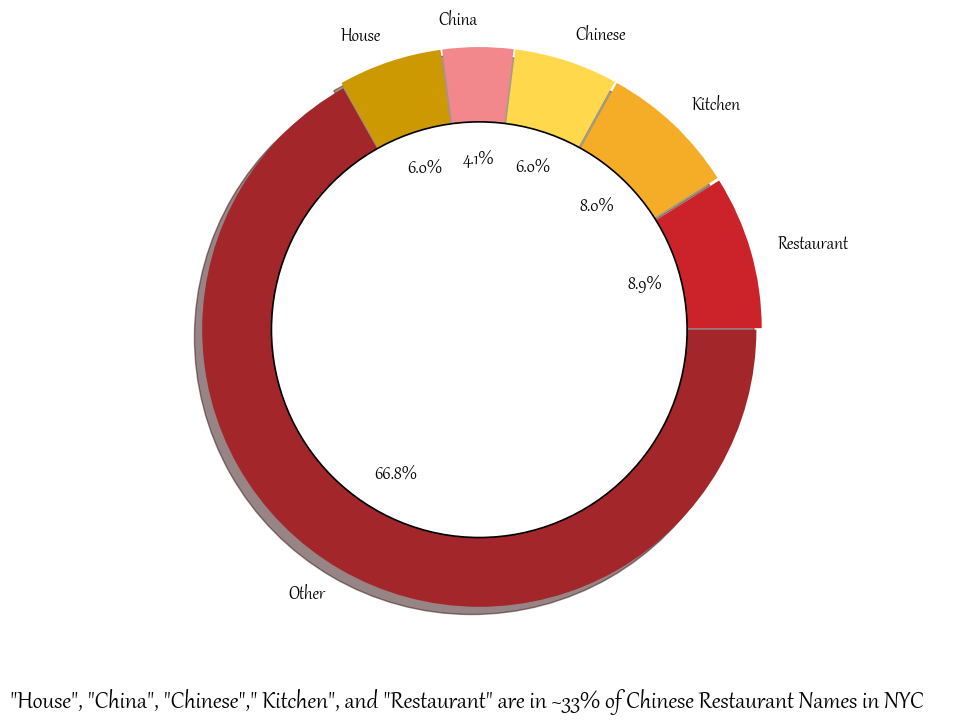

In [1838]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 15})

plt.rcParams["font.family"] = 'Gabriola'



# The slices will be ordered and plotted counter-clockwise.
labels = 'Restaurant', 'Kitchen',  'Chinese', 'China', 'House', 'Other'
sizes = [8.9, 8.0, 6.0, 4.1, 6, 66.5]
colors = ["#cc232a", "#f5ac27", "#ffd84b", "#f2888b", "#cc9902", "#a3262a"]
explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.0)  # explode a slice if required

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.2)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)



# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal') 
fig.text(x=0.5, y=0.02, s='"House", "China", "Chinese"," Kitchen", and "Restaurant" are in ~33% of Chinese Restaurant Names in NYC',
    color='black', fontsize=20, ha="center", fontfamily="Gabriola", fontweight="bold")

fig.savefig("donut.png", dpi=300)

In [1839]:
china_provinces_tableau = word_count_df[word_count_df['word'].isin(['Shanghai', 'Hunan', 'Sichuan'])]

In [1840]:
china_provinces_tableau

index      word  count  percent_of_words  percent_of_restaurants  \
4       4  Shanghai     12          0.021090                0.055814   
26     26     Hunan      4          0.007030                0.018605   
46     46   Sichuan      2          0.003515                0.009302   

    category  rank  
4   province     5  
26  province    22  
46  province    61

In [1841]:
import json

In [1842]:
chinese_provinces = json.load(open("C:\\Users\\riley\\OneDrive\\Desktop\\Data Portfolio Project\\a_highly_scientific_analysis_of_chinese_restaurant_names\\gadm36_CHN_1.json"))

In [1843]:
chinese_provinces

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[116.12962341, 29.82485008],
      [116.05905914, 30.20925522],
      [115.76095581, 30.67427635],
      [116.0011673, 30.9495163],
      [115.87502289, 31.14422417],
      [115.55741119, 31.15970039],
      [115.36437225, 31.40503883],
      [115.49180603, 31.67566681],
      [115.90435791, 31.82001877],
      [115.93076324, 32.16601944],
      [115.82931519, 32.52696991],
      [115.61597443, 32.41099548],
      [115.19152832, 32.5904808],
      [115.13391113, 32.89952469],
      [115.28569031, 33.13598633],
      [115.40752411, 33.55921555],
      [115.63195038, 33.58683777],
      [115.54928589, 33.89166641],
      [115.7220459, 34.08029938],
      [116.14985657, 33.71124649],
      [116.63354492, 33.98846436],
      [116.51093292, 34.29732513],
      [116.17365265, 34.43161392],
      [116.18591309, 34.57946777],
      [116.36860657, 34.64086914],
      [116.8230

In [1844]:
chinese_provinces['features'][0].keys()

dict_keys(['type', 'geometry', 'properties'])

In [1845]:
chinese_provinces

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[116.12962341, 29.82485008],
      [116.05905914, 30.20925522],
      [115.76095581, 30.67427635],
      [116.0011673, 30.9495163],
      [115.87502289, 31.14422417],
      [115.55741119, 31.15970039],
      [115.36437225, 31.40503883],
      [115.49180603, 31.67566681],
      [115.90435791, 31.82001877],
      [115.93076324, 32.16601944],
      [115.82931519, 32.52696991],
      [115.61597443, 32.41099548],
      [115.19152832, 32.5904808],
      [115.13391113, 32.89952469],
      [115.28569031, 33.13598633],
      [115.40752411, 33.55921555],
      [115.63195038, 33.58683777],
      [115.54928589, 33.89166641],
      [115.7220459, 34.08029938],
      [116.14985657, 33.71124649],
      [116.63354492, 33.98846436],
      [116.51093292, 34.29732513],
      [116.17365265, 34.43161392],
      [116.18591309, 34.57946777],
      [116.36860657, 34.64086914],
      [116.8230

In [1846]:
chinese_provinces['features'][0]['properties']

{'GID_0': 'CHN',
 'NAME_0': 'China',
 'GID_1': 'CHN.1_1',
 'NAME_1': 'Anhui',
 'VARNAME_1': 'Ānhuī',
 'NL_NAME_1': '安徽|安徽',
 'TYPE_1': 'Shěng',
 'ENGTYPE_1': 'Province',
 'CC_1': '',
 'HASC_1': 'CN.AH'}

In [1847]:
province_id_map = {}
for feature in chinese_provinces['features']:
    feature['id'] = feature['properties']['NAME_1']
    province_id_map[feature['properties']['NAME_1']] =feature['id']

In [1848]:
province_id_map

{'Anhui': 'Anhui',
 'Beijing': 'Beijing',
 'Chongqing': 'Chongqing',
 'Fujian': 'Fujian',
 'Gansu': 'Gansu',
 'Guangdong': 'Guangdong',
 'Guangxi': 'Guangxi',
 'Guizhou': 'Guizhou',
 'Hainan': 'Hainan',
 'Hebei': 'Hebei',
 'Heilongjiang': 'Heilongjiang',
 'Henan': 'Henan',
 'Hubei': 'Hubei',
 'Hunan': 'Hunan',
 'Jiangsu': 'Jiangsu',
 'Jiangxi': 'Jiangxi',
 'Jilin': 'Jilin',
 'Liaoning': 'Liaoning',
 'Nei Mongol': 'Nei Mongol',
 'Ningxia Hui': 'Ningxia Hui',
 'Qinghai': 'Qinghai',
 'Shaanxi': 'Shaanxi',
 'Shandong': 'Shandong',
 'Shanghai': 'Shanghai',
 'Shanxi': 'Shanxi',
 'Sichuan': 'Sichuan',
 'Tianjin': 'Tianjin',
 'Xinjiang Uygur': 'Xinjiang Uygur',
 'Xizang': 'Xizang',
 'Yunnan': 'Yunnan',
 'Zhejiang': 'Zhejiang'}

In [1849]:
china_provinces_tableau['id'] = china_provinces_tableau['word'].apply(lambda x:province_id_map[x])

C:\Users\riley\AppData\Local\Temp\ipykernel_8272\1084867768.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1850]:
china_provinces_tableau

index      word  count  percent_of_words  percent_of_restaurants  \
4       4  Shanghai     12          0.021090                0.055814   
26     26     Hunan      4          0.007030                0.018605   
46     46   Sichuan      2          0.003515                0.009302   

    category  rank        id  
4   province     5  Shanghai  
26  province    22     Hunan  
46  province    61   Sichuan

In [1851]:
chinese_provinces_list = ["Anhui", "Beijing", "Chongqing", "Fujian", "Gansu", "Guangdong", "Guangxi", "Guizhou", "Hainan", "Hebei", "Heilongjiang", 
                          "Henan", "Hubei", "Hunan", "Jiangsu", "Jiangxi", "Jilin", "Liaoning", "Qinghai", "Shaanxi", "Shandong", "Shanghai", 
                          "Shanxi", "Sichuan", "Tianjin", "Tibet", "Xinjiang", "Yunnan", "Zhejiang"]

In [1852]:
chinese_provinces_df = pd.DataFrame(chinese_provinces_list, columns=['id'])

In [1853]:
china_provinces_tableau= pd.merge(chinese_provinces_df, china_provinces_tableau, on='id', how='left')

In [1854]:
china_provinces_tableau['word'] = china_provinces_tableau['id']

In [1855]:
china_provinces_tableau = china_provinces_tableau.fillna(0)

In [1856]:
import plotly.express as px
import plotly.io as pio

In [1857]:
pio.renderers.default = ('browser')

In [1858]:
fig = px.choropleth(china_provinces_tableau, 
                        locations='word', 
                        fitbounds='locations',
                        geojson=chinese_provinces, color='count', 
                        hover_data = ['count'],
                        color_continuous_scale = px.colors.sequential.OrRd,

                        
                        )
fig.update_layout(title='Provinces in Chinese Restaurant Names', font_family='Gabriola', font_size=16.5)
fig.update_layout(title={
        'text': "Provinces in Chinese Restaurant Names",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
                  
fig.update_geos(fitbounds='locations', visible=False)

fig.update_layout(coloraxis_colorbar=dict(
    thicknessmode="pixels", thickness=7,
    lenmode="pixels", len=110,
    yanchor="top", y=0.75,
    ticks="outside",
    dtick=4, 
    title='Count',
))
fig.show()
fig.write_html("plotly_choropleth.html")


# Barplots

In [1859]:
word_count_df['category'].value_counts()


other             253
food               23
family name        16
place              14
tastes             10
royalty             8
province            6
direction           5
precious metal      3
animals             3
Name: category, dtype: int64

Text(0, 0.5, 'Count')

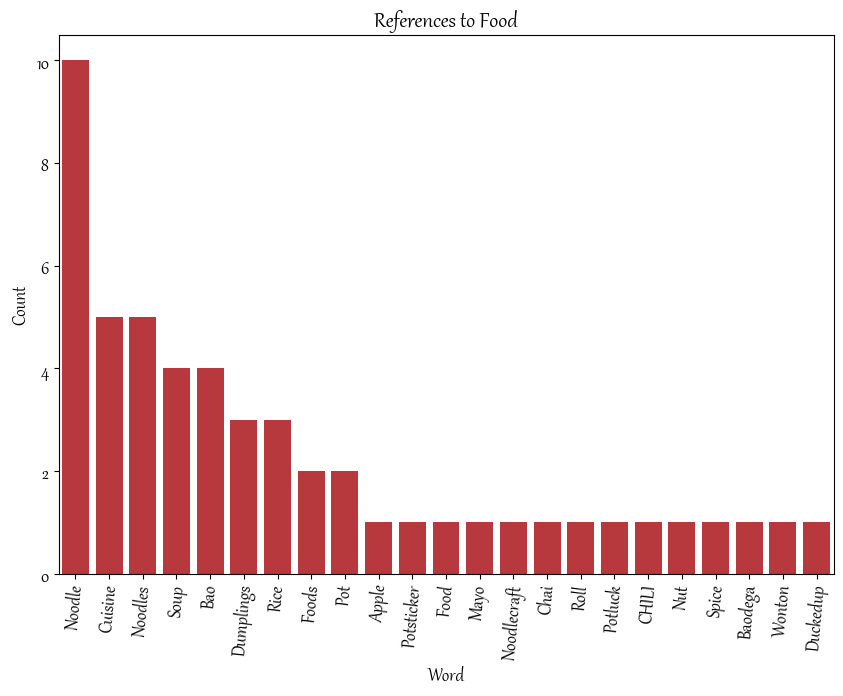

In [1860]:
plt.figure(figsize=(10,7))
plt.title('References to Food')
plt.xticks(rotation=85)
sns.barplot(data=word_count_df[word_count_df['category']=='food'], x='word', y='count', color='#CC232A')
plt.xlabel('Word')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

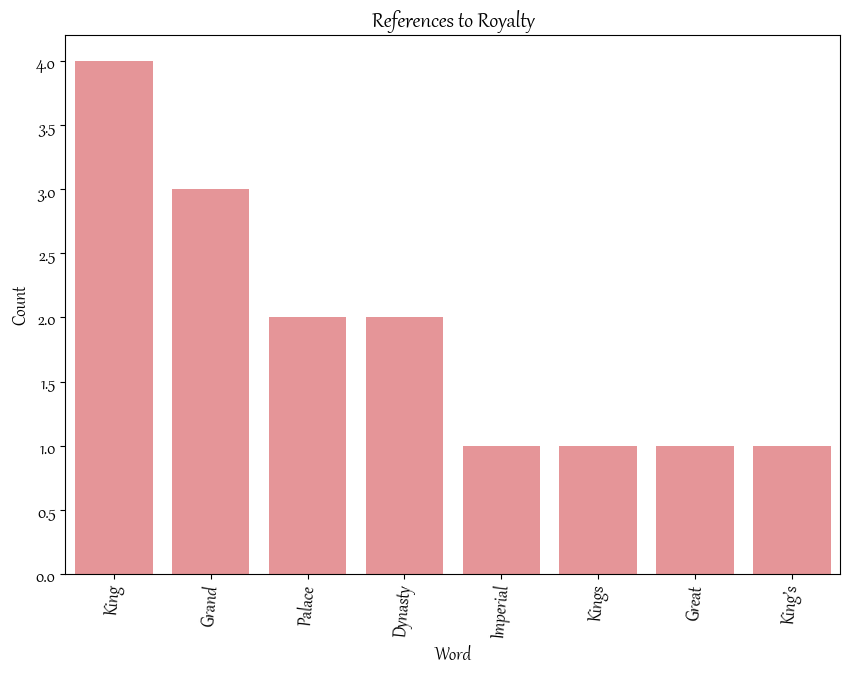

In [1861]:
plt.figure(figsize=(10,7))
plt.title('References to Royalty')
plt.xticks(rotation=85)
sns.barplot(data=word_count_df[word_count_df['category']=='royalty'], x='word', y='count', color="#F2888B")
plt.xlabel('Word')
plt.ylabel('Count')

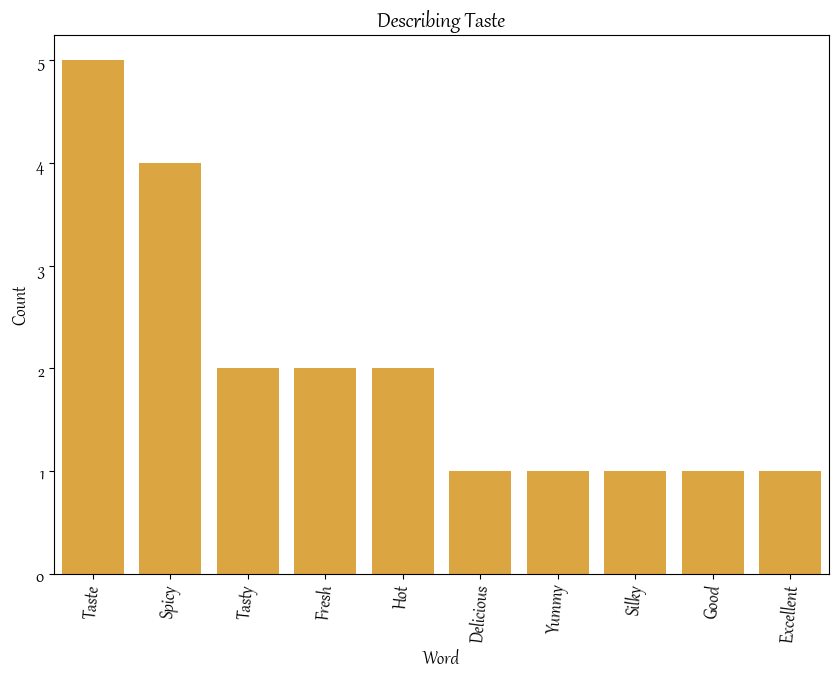

In [1862]:

plt.figure(figsize=(10,7))
plt.title('Describing Taste')
plt.xticks(rotation=85)
sns.barplot(data=word_count_df[word_count_df['category']=='tastes'], x='word', y='count', color="#F5AC27")
plt.xlabel('Word')
plt.ylabel('Count')
fig.show()


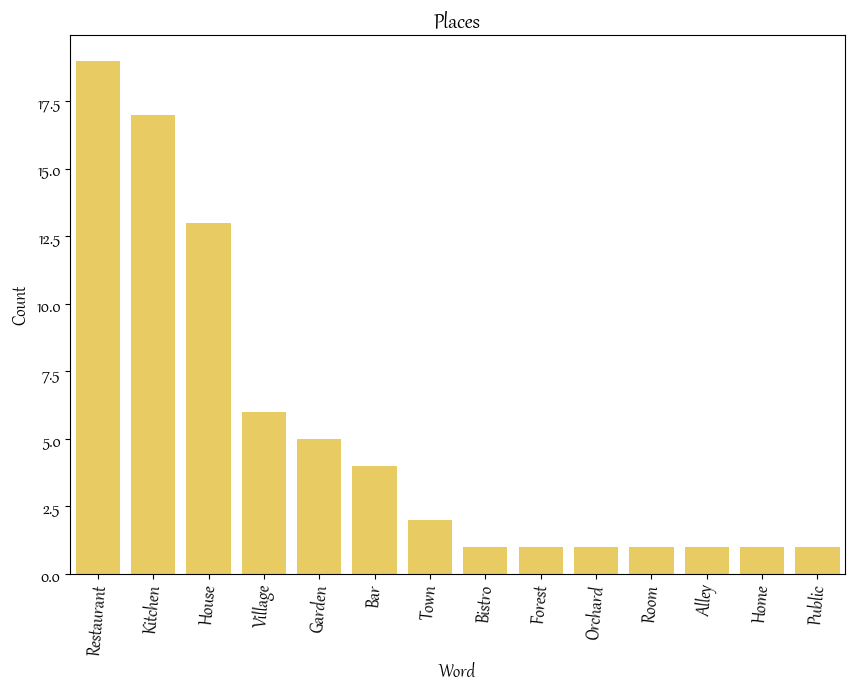

In [1863]:

plt.figure(figsize=(10,7))
plt.title('Places')
plt.xticks(rotation=85)
sns.barplot(data=word_count_df[word_count_df['category']=='place'], x='word', y='count', color="#FFD84B")
plt.xlabel('Word')
plt.ylabel('Count')
fig.show()

In [1864]:
word_count_df_filt = word_count_df[word_count_df['category']=='family name']

In [1865]:
px_categories = word_count_df[word_count_df['category'].isin(category_list)]

In [1866]:
fig = px.bar(px_categories, 
             x='count', 
             y='word', 
             title='Describing Taste', 
             color='category', color_discrete_map={'place': '#A3262A', 'food': '#F2888B', 
                                                   'tastes': '#F5AC27', 'animals': '#FFD84B' , 
                                                   'royalty': '#4c8c4c', 'family_name': '#97c1df',
                                                   'precious metal': '#a1aaa8', 'direction': '#97c1df' })
fig.update_layout(title='Word themes in NYC Chinese Restaurant Names', font_family='Gabriola', font_size=14)
fig.update_layout(title={
        'text': "Word Themes in NYC Chinese Restaurant Names",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()
fig.write_html("plotly_bar.html")

In [1867]:
word_count_df_filt = word_count_df[word_count_df['category'].isin(category_list)]

### Circle Packing Chart

In [1868]:
word_count_df_filt = word_count_df[word_count_df['category']=='family name']

In [1869]:
fig = px.sunburst(
    word_count_df_filt, 
    path=['category', 'word'],
    values='count',
    color='count', 
    color_continuous_scale= 'Burgyl',
hover_data=['count'])

fig.update_layout(title='Word themes in NYC Chinese Restaurant Names', font_family='Gabriola', font_size=14)
fig.update_layout(title=('Family Names in NYC Chinese Restaurants'))
fig.update_layout(title={
        'text': 'Family Names in NYC Chinese Restaurants',
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(coloraxis_colorbar=dict(
    thicknessmode="pixels", thickness=3.5,
    lenmode="pixels", len=100,
    yanchor="top", y=0.85,
    ticks="outside",
    dtick = 4,
    title='Count',))


fig.show()
fig.write_html("family_name_sunburst.html")